In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls -lab

total 20
drwxr-xr-x 1 root root 4096 Apr 25 22:45 ./
drwxr-xr-x 1 root root 4096 Apr 25 22:40 ../
drwxr-xr-x 1 root root 4096 Apr 19 14:22 .config/
drwx------ 5 root root 4096 Apr 25 22:45 drive/
drwxr-xr-x 1 root root 4096 Apr 19 14:23 sample_data/


In [ ]:
pwd

'/content'

In [ ]:
ls -lab

total 20
drwxr-xr-x 1 root root 4096 Apr 25 22:45 ./
drwxr-xr-x 1 root root 4096 Apr 25 22:40 ../
drwxr-xr-x 1 root root 4096 Apr 19 14:22 .config/
drwx------ 5 root root 4096 Apr 25 22:45 drive/
drwxr-xr-x 1 root root 4096 Apr 19 14:23 sample_data/


In [ ]:
cd /content/drive/MyDrive/FinalProject/Flicker8k_Dataset/

/content/drive/MyDrive/FinalProject/Flicker8k_Dataset


In [ ]:
cd /content/drive/MyDrive/FinalProject/Flickr8k_test/

/content/drive/MyDrive/FinalProject/Flickr8k_test


In [ ]:
ls

CrowdFlowerAnnotations.txt  Flickr8k.lemma.token.txt  Flickr_8k.trainImages.txt
ExpertAnnotations.txt       Flickr_8k.testImages.txt  __MACOSX/
Flickr_8k.devImages.txt     Flickr8k.token.txt        readme.txt


In [ ]:
ls -lab

total 9883
-rw------- 1 root root 2918552 Oct 14  2013 CrowdFlowerAnnotations.txt
-rw------- 1 root root  346674 Oct 14  2013 ExpertAnnotations.txt
-rw------- 1 root root   25801 Oct 10  2013 Flickr_8k.devImages.txt
-rw------- 1 root root 3244761 Feb 16  2012 Flickr8k.lemma.token.txt
-rw------- 1 root root   25775 Oct 10  2013 Flickr_8k.testImages.txt
-rw------- 1 root root 3395237 Oct 14  2013 Flickr8k.token.txt
-rw------- 1 root root  154678 Oct 10  2013 Flickr_8k.trainImages.txt
drwx------ 2 root root    4096 Apr 22 03:10 __MACOSX/
-rw------- 1 root root    1821 Oct 14  2013 readme.txt


In [ ]:
cd /content/drive/MyDrive/FinalProject/Flickr8k_test/

/content/drive/MyDrive/FinalProject/Flickr8k_test


In [ ]:
!pip install keras.utils 


  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=8b76bbe228ffa7091efae35bff0fb9b920d2e23b589c264420d370f50cfac053
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [2]:
import glob
import string
import numpy as np
import pandas as pd
from numpy import array
from pickle import load

from PIL import Image
import pickle
from collections import Counter
import matplotlib.pyplot as plt

import sys, time, os, warnings
warnings.filterwarnings("ignore")
import re

import keras
import tensorflow as tf
from tqdm import tqdm
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

#from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, BatchNormalization
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import GRU
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from keras.applications.resnet_v2 import ResNet152V2, preprocess_input

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [ ]:
pwd


'/content'

In [ ]:
cd drive/MyDrive/FinalProject/

[Errno 2] No such file or directory: 'drive/MyDrive/FinalProject/'
/content


In [ ]:
ls -lab

total 72103
-rw------- 1 root root  3319294 Sep 12  2020 captions.txt
-rw------- 1 root root  3105134 Apr 25 17:22 descriptions.txt
-rw------- 1 root root 67047760 Apr 25 17:42 features.p
drwx------ 2 root root     4096 Apr 22 03:12 Flicker8k_Dataset/
drwx------ 3 root root     4096 Apr 22 03:10 Flickr8k_test/
-rw------- 1 root root   351811 Apr 22 03:13 tokenizer.p


In [ ]:
cd drive/MyDrive/FinalProject/Flicker8k_Dataset

[Errno 2] No such file or directory: 'drive/MyDrive/FinalProject/Flicker8k_Dataset'
/content/drive/MyDrive/FinalProject/Flickr8k_test


In [3]:
image_path = "/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/"
dir_Flickr_text = "/content/drive/MyDrive/FinalProject/Flickr8k_test/Flickr8k.token.txt"

jpgs = os.listdir(image_path)

print("Total Images in Dataset = {}".format(len(jpgs)))

Total Images in Dataset = 8091


In [ ]:
ls

CrowdFlowerAnnotations.txt  Flickr8k.lemma.token.txt  Flickr_8k.trainImages.txt
ExpertAnnotations.txt       Flickr_8k.testImages.txt  __MACOSX/
Flickr_8k.devImages.txt     Flickr8k.token.txt        readme.txt


In [4]:
file = open(dir_Flickr_text,"r")
text = file.read()
file.close()

datatxt = []
for line in text.split('\n'):
   pre_col = line.split()
   if len(pre_col) == 0:
       continue
   col = []
   col.append(pre_col[0])
   col.append(' '.join(pre_col[1:]))
   w = col[0].split("#")
   datatxt.append(w + [col[1].lower()])

data = pd.DataFrame(datatxt,columns=["filename","index","caption"])
data = data.reindex(columns =['index','filename','caption'])
data = data[data.filename != '2258277193_586949ec62.jpg.1']
uni_filenames = np.unique(data.filename.values)

data.head()

index                   filename  \
0     0  1000268201_693b08cb0e.jpg   
1     1  1000268201_693b08cb0e.jpg   
2     2  1000268201_693b08cb0e.jpg   
3     3  1000268201_693b08cb0e.jpg   
4     4  1000268201_693b08cb0e.jpg   

                                             caption  
0  a child in a pink dress is climbing up a set o...  
1              a girl going into a wooden building .  
2   a little girl climbing into a wooden playhouse .  
3  a little girl climbing the stairs to her playh...  
4  a little girl in a pink dress going into a woo...

In [5]:
vocabulary = []
for txt in data.caption.values:
   vocabulary.extend(txt.split())
print('Vocabulary Size: %d' % len(set(vocabulary)))

Vocabulary Size: 8918


In [6]:
def remove_punctuation(text_original):
   text_no_punctuation = text_original.translate(string.punctuation)
   return(text_no_punctuation)

def remove_single_character(text):
   text_len_more_than1 = ""
   for word in text.split():
       if len(word) > 1:
           text_len_more_than1 += " " + word
   return(text_len_more_than1)

def remove_numeric(text): 
   text_no_numeric = ""
   for word in text.split():
       isalpha = word.isalpha()
       if isalpha:
           text_no_numeric += " " + word
   return(text_no_numeric)

def text_clean(text_original):
   text = remove_punctuation(text_original)
   text = remove_single_character(text)
   text = remove_numeric(text)
   return(text)

for i, caption in enumerate(data.caption.values):
   newcaption = text_clean(caption)
   data["caption"].iloc[i] = newcaption

In [7]:
clean_vocabulary = []
for txt in data.caption.values:
   clean_vocabulary.extend(txt.split())
print('Clean Vocabulary Size: %d' % len(set(clean_vocabulary)))

Clean Vocabulary Size: 8357


In [8]:
all_captions = []
for caption  in data["caption"].astype(str):
   caption = '<start> ' + caption+ ' <end>'
   all_captions.append(caption)

all_captions[:10]

['<start>  child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start>  girl going into wooden building <end>',
 '<start>  little girl climbing into wooden playhouse <end>',
 '<start>  little girl climbing the stairs to her playhouse <end>',
 '<start>  little girl in pink dress going into wooden cabin <end>',
 '<start>  black dog and spotted dog are fighting <end>',
 '<start>  black dog and dog playing with each other on the road <end>',
 '<start>  black dog and white dog with brown spots are staring at each other in the street <end>',
 '<start>  two dogs of different breeds looking at each other on the road <end>',
 '<start>  two dogs on pavement moving toward each other <end>']

In [9]:
PATH = "/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/"
all_img_name_vector = []
for annot in data["filename"]:
   full_image_path = PATH + annot
   all_img_name_vector.append(full_image_path)

all_img_name_vector[:10]

['/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 '/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 '/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 '/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 '/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 '/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
 '/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
 '/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
 '/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
 '/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/1001773457_577c3a7d70.jpg']

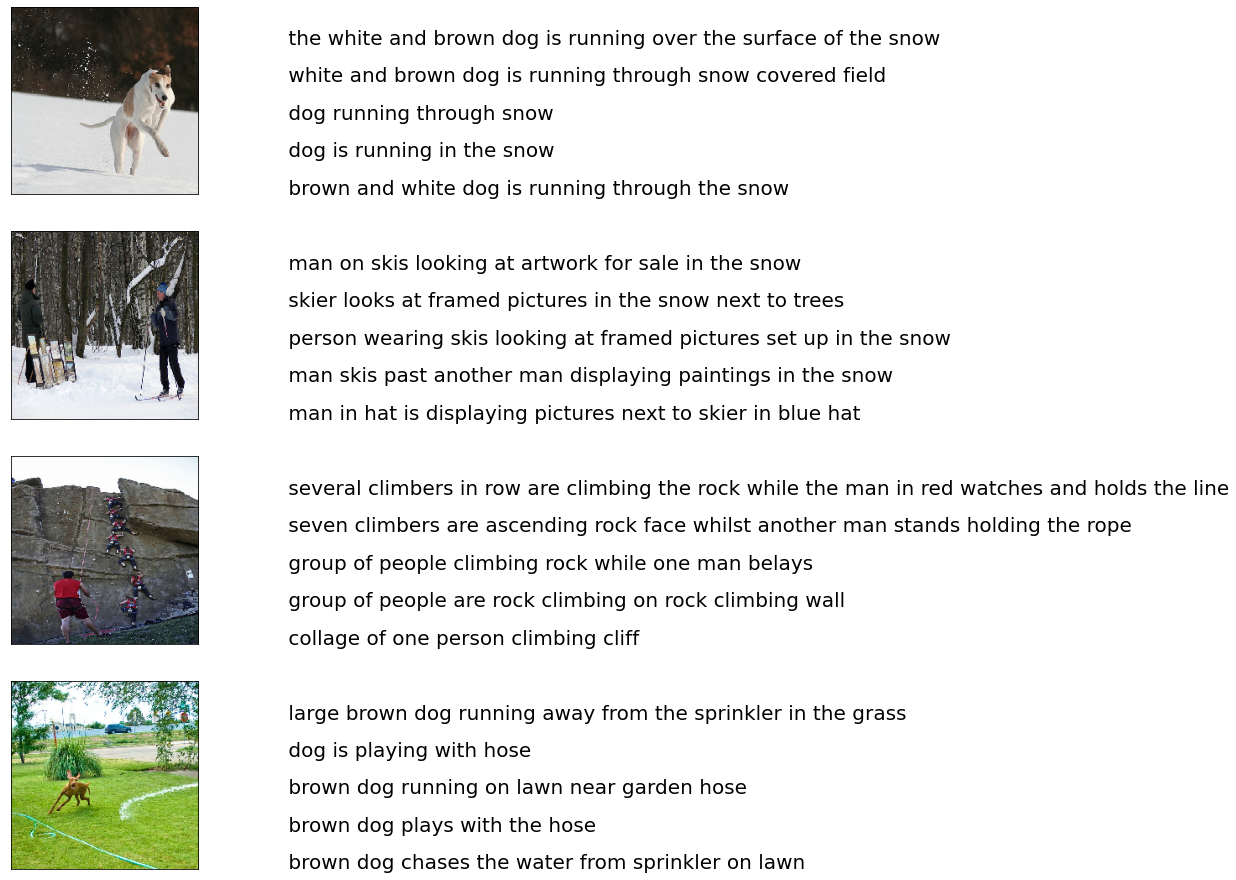

In [10]:
npic = 5
npix = 224
target_size = (npix,npix,3)
count = 1

fig = plt.figure(figsize=(10,20))
for jpgfnm in uni_filenames[10:14]:
   filename = image_path + '/' + jpgfnm
   captions = list(data["caption"].loc[data["filename"]==jpgfnm].values)
   image_load = load_img(filename, target_size=target_size)
   ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
   ax.imshow(image_load)
   count += 1

   ax = fig.add_subplot(npic,2,count)
   plt.axis('off')
   ax.plot()
   ax.set_xlim(0,1)
   ax.set_ylim(0,len(captions))
   for i, caption in enumerate(captions):
       ax.text(0,i,caption,fontsize=20)
   count += 1
plt.show()

In [11]:
print(f"len(all_img_name_vector) : {len(all_img_name_vector)}")
print(f"len(all_captions) : {len(all_captions)}")

len(all_img_name_vector) : 40455
len(all_captions) : 40455


In [12]:
def data_limiter(num,total_captions,all_img_name_vector):
 train_captions, img_name_vector = shuffle(total_captions,all_img_name_vector,random_state=1)
 train_captions = train_captions[:num]
 img_name_vector = img_name_vector[:num]
 return train_captions,img_name_vector

train_captions,img_name_vector = data_limiter(40000,all_captions,all_img_name_vector)

In [13]:
def load_image(image_path):
   img = tf.io.read_file(image_path)
   img = tf.image.decode_jpeg(img, channels=3)
   img = tf.image.resize(img, (224, 224))
   img = preprocess_input(img)
   return img, image_path

image_model = ResNet152V2(include_top=False, weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_features_extract_model = Model(new_input, hidden_layer)

image_features_extract_model.summary()

234561536/234545216 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                           

In [14]:
encode_train = sorted(set(img_name_vector))
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(64)

In [33]:
%time
os.makedirs('/content/drive/MyDrive/FinalProject/flickr_features')
for img, image_path in tqdm(image_dataset):
 batch_features = image_features_extract_model(img)
 batch_features = tf.reshape(batch_features,
                             (batch_features.shape[0], -1, batch_features.shape[3]))

 for bf, p in zip(batch_features, image_path):
   path_of_feature = p.numpy().decode("utf-8")
   path_of_feature = "/content/drive/MyDrive/FinalProject/flickr_features/"+path_of_feature.split('/')[-1]
   np.save(path_of_feature, bf.numpy())

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.2 µs


100%|██████████| 127/127 [1:02:21<00:00, 29.46s/it]


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.531897 to fit



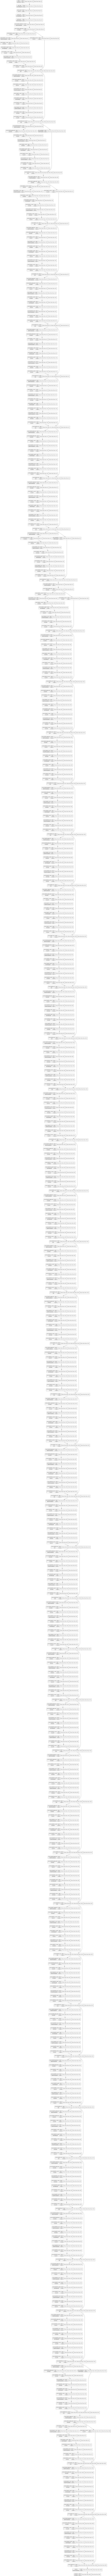

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(image_features_extract_model, to_file='model=image_features_extract_model.png', show_shapes=True)


In [34]:
top_k = len(clean_vocabulary)
tokenizer = Tokenizer(num_words=top_k,
                      oov_token="<unk>",
                      filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')

tokenizer.fit_on_texts(train_captions)
train_seqs = tokenizer.texts_to_sequences(train_captions)
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(train_captions)
cap_vector = pad_sequences(train_seqs, padding='post')

In [35]:
def calc_max_length(tensor):
   return max(len(t) for t in tensor)
max_length = calc_max_length(train_seqs)

def calc_min_length(tensor):
   return min(len(t) for t in tensor)
min_length = calc_min_length(train_seqs)

print('Max Length of any caption : Min Length of any caption = '+ str(max_length) +" : "+str(min_length))

Max Length of any caption : Min Length of any caption = 33 : 2


In [36]:
index = 0
for image_path in img_name_vector:
    img_name_vector[index] = "/content/drive/MyDrive/FinalProject/flickr_features/" + image_path.split('/')[-1]
    index = index + 1
img_name_train, img_name_val, cap_train, cap_val = train_test_split(img_name_vector,cap_vector, test_size=0.2, random_state=0)

In [37]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = len(tokenizer.word_index) + 1
num_steps = len(img_name_train) // BATCH_SIZE
features_shape = 512
attention_features_shape = 49

In [38]:
def map_func(img_name, cap):
 img_tensor = np.load(img_name.decode('utf-8')+'.npy')
 return img_tensor, cap
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
        map_func, [item1, item2], [tf.float32, tf.int32]),
         num_parallel_calls=tf.data.experimental.AUTOTUNE)

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [39]:
embeddings_index = {} 
f = open('/content/drive/MyDrive/FinalProject/glove.840B.300d.txt', encoding="utf-8")
for line in f:
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

# New Section

In [40]:
embedding_dim = len(list(embeddings_index.values())[0])
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [41]:
class ResNet_Encoder(Model):
   # This encoder passes the features through a Fully connected layer
   def __init__(self, embedding_dim):
       super(ResNet_Encoder, self).__init__()
       # shape after fc == (batch_size, 49, embedding_dim)
       self.fc = Dense(embedding_dim)
       self.dropout = Dropout(0.5, noise_shape=None, seed=None)
   def call(self, x):
       #x= self.dropout(x)
       x = self.fc(x)
       x = tf.nn.relu(x)
       return x   

In [42]:
def rnn_type(units):
   if tf.test.is_gpu_available():
       return CuDNNLSTM(units,
                        return_sequences=True,
                        return_state=True,
                        recurrent_initializer='glorot_uniform')
   else:
       return GRU(units,
                  return_sequences=True,
                  return_state=True,
                  recurrent_activation='sigmoid',
                  recurrent_initializer='glorot_uniform')


In [43]:
'''The encoder output(i.e. 'features'), hidden state(initialized to 0)(i.e. 'hidden') and
the decoder input (which is the start token)(i.e. 'x') is passed to the decoder.'''

class Rnn_Local_Decoder(Model):
 def __init__(self, embedding_dim, units, vocab_size):
   super(Rnn_Local_Decoder, self).__init__()
   self.units = units
   self.embedding = Embedding(vocab_size, embedding_dim, trainable=False, weights=[embedding_matrix])
   #self.embedding = Embedding(vocab_size, embedding_dim)
   self.gru = GRU(self.units,
                  return_sequences=True,
                  return_state=True,
                  recurrent_initializer='glorot_uniform')
  
   self.fc1 = Dense(self.units)

   self.dropout = Dropout(0.5, noise_shape=None, seed=None)
   self.batchnormalization = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

   self.fc2 = Dense(vocab_size)

   # Implementing Attention Mechanism
   self.Uattn = Dense(units)
   self.Wattn = Dense(units)
   self.Vattn = Dense(1)
 def call(self, x, features, hidden):
   # features shape ==> (64,49,256) ==> Output from ENCODER
   # hidden shape == (batch_size, hidden_size) ==>(64,512)
   # hidden_with_time_axis shape == (batch_size, 1, hidden_size) ==> (64,1,512)

   hidden_with_time_axis = tf.expand_dims(hidden, 1)

   # score shape == (64, 49, 1)
   # Attention Function
   '''e(ij) = f(s(t-1),h(j))'''
   ''' e(ij) = Vattn(T)*tanh(Uattn * h(j) + Wattn * s(t))'''

   score = self.Vattn(tf.nn.tanh(self.Uattn(features) + self.Wattn(hidden_with_time_axis)))

   # self.Uattn(features) : (64,49,512)
   # self.Wattn(hidden_with_time_axis) : (64,1,512)
   # tf.nn.tanh(self.Uattn(features) + self.Wattn(hidden_with_time_axis)) : (64,49,512)
   # self.Vattn(tf.nn.tanh(self.Uattn(features) + self.Wattn(hidden_with_time_axis))) : (64,49,1) ==> score

   # you get 1 at the last axis because you are applying score to self.Vattn
   # Then find Probability using Softmax
   '''attention_weights(alpha(ij)) = softmax(e(ij))'''

   attention_weights = tf.nn.softmax(score, axis=1)

   # attention_weights shape == (64, 49, 1)
   # Give weights to the different pixels in the image
   ''' C(t) = Summation(j=1 to T) (attention_weights * VGG-16 features) '''

   context_vector = attention_weights * features
   context_vector = tf.reduce_sum(context_vector, axis=1)

   # Context Vector(64,256) = AttentionWeights(64,49,1) * features(64,49,256)
   # context_vector shape after sum == (64, 256)
   # x shape after passing through embedding == (64, 1, 256)

   x = self.embedding(x)
   # x shape after concatenation == (64, 1,  512)

   x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
   # passing the concatenated vector to the GRU

   output, state = self.gru(x)
   # shape == (batch_size, max_length, hidden_size)

   x = self.fc1(output)
   # x shape == (batch_size * max_length, hidden_size)

   x = tf.reshape(x, (-1, x.shape[2]))

   # Adding Dropout and BatchNorm Layers
   x= self.dropout(x)
   x= self.batchnormalization(x)

   # output shape == (64 * 512)
   x = self.fc2(x)

   # shape : (64 * 8329(vocab))
   return x, state, attention_weights

 def reset_state(self, batch_size):
   return tf.zeros((batch_size, self.units))


encoder = ResNet_Encoder(embedding_dim)
decoder = Rnn_Local_Decoder(embedding_dim, units, vocab_size)


In [44]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
   from_logits=True, reduction='none')

def loss_function(real, pred):
 mask = tf.math.logical_not(tf.math.equal(real, 0))
 loss_ = loss_object(real, pred)
 mask = tf.cast(mask, dtype=loss_.dtype)
 loss_ *= mask

 return tf.reduce_mean(loss_)


In [45]:
loss_plot = []

@tf.function
def train_step(img_tensor, target):
 loss = 0
 # initializing the hidden state for each batch
 # because the captions are not related from image to image

 hidden = decoder.reset_state(batch_size=target.shape[0])
 dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * BATCH_SIZE, 1)

 with tf.GradientTape() as tape:
     features = encoder(img_tensor)
     for i in range(1, target.shape[1]):
         # passing the features through the decoder
         predictions, hidden, _ = decoder(dec_input, features, hidden)
         loss += loss_function(target[:, i], predictions)

         # using teacher forcing
         dec_input = tf.expand_dims(target[:, i], 1)

 total_loss = (loss / int(target.shape[1]))
 trainable_variables = encoder.trainable_variables + decoder.trainable_variables
 gradients = tape.gradient(loss, trainable_variables)
 optimizer.apply_gradients(zip(gradients, trainable_variables))

 return loss, total_loss

In [48]:
EPOCHS = 3
elapsed_start = time.time()
for epoch in range(0, EPOCHS):
   start = time.time()
   total_loss = 0

   for (batch, (img_tensor, target)) in enumerate(dataset):
       batch_loss, t_loss = train_step(img_tensor, target)
       total_loss += t_loss

       if batch % 100 == 0:
           print ('Epoch {} Batch {} Loss {:.4f}'.format(
             epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
   # storing the epoch end loss value to plot later
   loss_plot.append(total_loss / num_steps)

   print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                        total_loss/num_steps))

   print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
print(f'Time taken to train model: {time.time() - elapsed_start} seconds')

Epoch 1 Batch 0 Loss 0.5097
Epoch 1 Batch 100 Loss 0.4861
Epoch 1 Batch 200 Loss 0.5515
Epoch 1 Batch 300 Loss 0.5066
Epoch 1 Batch 400 Loss 0.5297
Epoch 1 Loss 0.546591
Time taken for 1 epoch 2542.0659749507904 sec

Epoch 2 Batch 0 Loss 0.5261
Epoch 2 Batch 100 Loss 0.4637
Epoch 2 Batch 200 Loss 0.5541
Epoch 2 Batch 300 Loss 0.4981
Epoch 2 Batch 400 Loss 0.5163
Epoch 2 Loss 0.508347
Time taken for 1 epoch 2424.1524312496185 sec

Epoch 3 Batch 0 Loss 0.4521
Epoch 3 Batch 100 Loss 0.4088
Epoch 3 Batch 200 Loss 0.4413
Epoch 3 Batch 300 Loss 0.4216
Epoch 3 Batch 400 Loss 0.4876
Epoch 3 Loss 0.472122
Time taken for 1 epoch 2482.4888215065002 sec

Time taken to train model: 7448.7559587955475 seconds


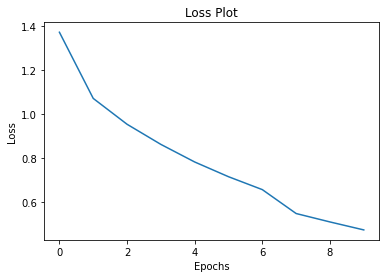

In [49]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [50]:
def evaluate(image):
   attention_plot = np.zeros((max_length, attention_features_shape))

   hidden = decoder.reset_state(batch_size=1)
   temp_input = tf.expand_dims(load_image(image)[0], 0)
   img_tensor_val = image_features_extract_model(temp_input)
   img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

   features = encoder(img_tensor_val)
   dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
   result = []

   for i in range(max_length):
       predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
       attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
       predicted_id = tf.argmax(predictions[0]).numpy()
       result.append(tokenizer.index_word[predicted_id])

       if tokenizer.index_word[predicted_id] == '<end>':
           return result, attention_plot

       dec_input = tf.expand_dims([predicted_id], 0)
   attention_plot = attention_plot[:len(result), :]

   return result, attention_plot

In [51]:
def plot_attention(image, result, attention_plot):
   temp_image = np.array(Image.open(image))
   fig = plt.figure(figsize=(10, 10))
   len_result = len(result)
   for l in range(len_result):
       temp_att = np.resize(attention_plot[l], (8, 8))
       ax = fig.add_subplot(len_result//2, len_result//2, l+1)
       ax.set_title(result[l])
       img = ax.imshow(temp_image)
       ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

   plt.tight_layout()
   plt.show()

In [52]:
index = 0
for image_path in img_name_val:
    img_name_val[index] = '/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/' + image_path.split('/')[-1]
    index = index + 1

Real Caption: puppy jumps on bed with purple sheets
Prediction Caption: small puppy is laying on bed with blue sheets
time took to Predict: 2 sec


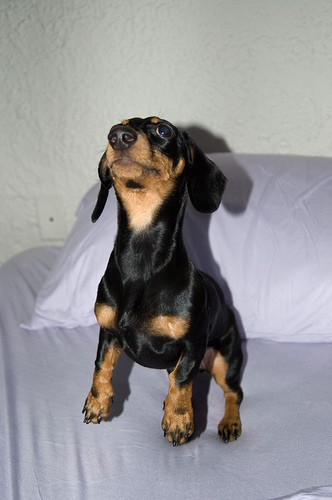

In [53]:
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
start = time.time()
real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

first = real_caption.split(' ', 1)[1]
real_caption = first.rsplit(' ', 1)[0]

#remove "<unk>" in result
for i in result:
   if i=="<unk>":
       result.remove(i)

#remove <end> from result        
result_join = ' '.join(result)
result_final = result_join.rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = result_final

print ('Real Caption:', real_caption)
print ('Prediction Caption:', result_final)

#plot_attention(image, result, attention_plot)
print(f"time took to Predict: {round(time.time()-start)} sec")

Image.open(img_name_val[rid])

In [54]:
actual = []
predicted = []

with open('/content/drive/MyDrive/FinalProject/Flickr8k_test/Flickr_8k.testImages.txt', 'r') as image_names:
    for img in image_names:
        captions = [cap.split() for cap in list(data[data.filename==img]['caption'])]
        result, attention_plot = evaluate('/content/drive/MyDrive/FinalProject/Flicker8k_Dataset/'+img.strip())
        
        #remove "<unk>" in result
        for i in result:
           if i=="<unk>":
               result.remove(i)

        #remove <end> from result        
        result_join = ' '.join(result)
        result_final = result_join.rsplit(' ', 1)[0]

        actual.append(captions)
        predicted.append(result_final.split()) 

In [56]:
hypothesis="puppy jumps on bed with purple sheets"

In [57]:
hypothesis="small puppy is laying on bed with blue sheets"
hypothesis = hypothesis.split()
reference = "puppy jumps on bed with purple sheets"
reference = [reference.split()]

from nltk.translate.bleu_score import sentence_bleu
print("BLEU={:4.3f}".format(sentence_bleu(reference, hypothesis)))

BLEU=0.375


In [58]:
hypothesis = "I like dog"
hypothesis = hypothesis.split()
reference = "I do like dog"
reference = [reference.split()]

from nltk.translate.bleu_score import sentence_bleu
print("BLEU={:4.3f}".format(sentence_bleu(reference, hypothesis)))

BLEU=0.603


In [59]:
hypothesis2 = "I love dog!".split()
print("BLEU={:4.3f}".format(sentence_bleu(reference,  hypothesis2))) 

BLEU=0.544
